In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import iris
from iris import coord_categorisation as icc
from iris import plot as iplt
from iris import quickplot as qplt
from iris.analysis import maths as iam
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.cm as cm
import cartopy.crs as ccrs

In [4]:
# yyyy, mm = (1850, 1) # t=0
# yyyy, mm = (1853, 10) # Crimean War began
# yyyy, mm = (1871, 1) # German unificiation completed
# yyyy, mm = (1914, 6) # Assassination of Archduke Franz Ferdinand
# yyyy, mm = (1937, 7) # Japan invaded China
# yyyy, mm = (1939, 9) # Germany invaded Poland
yyyy, mm = (1957, 10) # Sputnik 1 launched
# yyyy, mm = (1969, 7) # Apollo Landing
# yyyy, mm = (1980, 12) # John Lennon killed
# yyyy, mm = (2004, 12) # Sumatra–Andaman earthquake


In [5]:
uncorr_errcov_path = "/noc/mpoc/surface_data/HadCRUT5_extra/"
uncorr_errcov_file = uncorr_errcov_path+"HadCRUT.5.0.2.0.uncorrelated.nc"
print(uncorr_errcov_file)

/noc/mpoc/surface_data/HadCRUT5_extra/HadCRUT.5.0.2.0.uncorrelated.nc


In [6]:
uncorr_errcov = iris.load_cube(uncorr_errcov_file)
icc.add_month_number(uncorr_errcov, 'time')
icc.add_year(uncorr_errcov, 'time')
yyyy_constraint = iris.Constraint(year=yyyy)
mm_constraint = iris.Constraint(month_number=mm)
uncorr_errcov = uncorr_errcov.extract(yyyy_constraint & mm_constraint)
print(repr(uncorr_errcov))

<iris 'Cube' of standard_uncertainty in blended air_temperature_anomaly over land with sea_water_temperature_anomaly / (K) (latitude: 36; longitude: 72)>


In [7]:
corr_errcov_path = "/noc/mpoc/surface_data/HadCRUT5_extra/error_cov/"
corr_errcov_file = corr_errcov_path+f"HadCRUT.5.0.2.0.error_covariance.{yyyy}{mm:02}.nc"
print(corr_errcov_file)

/noc/mpoc/surface_data/HadCRUT5_extra/error_cov/HadCRUT.5.0.2.0.error_covariance.195710.nc


In [8]:
corr_errcov = iris.load_cube(corr_errcov_file)[0]
print(repr(corr_errcov))

<iris 'Cube' of error_covariance for blended air_temperature_anomaly over land with sea_water_temperature_anomaly / (K2) (location_index_1: 2592; location_index_2: 2592)>


In [9]:
n_points = corr_errcov.shape[0]
n_lats = len(uncorr_errcov.coord('latitude').points)
n_lons = len(uncorr_errcov.coord('longitude').points)
print(n_points, n_lats, n_lons)

2592 36 72


In [10]:
for pt in range(n_points):
    if pt % 6 != 0:
        continue
    ix = pt % n_lons
    iy = pt // n_lons
    print(pt, ix, iy)
    uncorr_errcov_cubbie = uncorr_errcov[iy, ix]
    ulat, ulon = (uncorr_errcov_cubbie.coord('latitude').points[0], 
                  uncorr_errcov_cubbie.coord('longitude').points[0])
    corr_errcov_cubbie = corr_errcov[pt, pt]
    clats, clons = [], []
    for coord in corr_errcov_cubbie.coords():
        if coord.name() == 'latitude':
            clats.append(coord.points[0])
        if coord.name() == 'longitude':
            clons.append(coord.points[0])
    print(ulat, ulon, clats, clons)
    assert(ulat == clats[0])
    assert(ulat == clats[1])
    assert(ulon == clons[0])
    assert(ulon == clons[1])

0 0 0
-87.5 -177.5 [-87.5, -87.5] [-177.5, -177.5]
6 6 0
-87.5 -147.5 [-87.5, -87.5] [-147.5, -147.5]
12 12 0
-87.5 -117.5 [-87.5, -87.5] [-117.5, -117.5]
18 18 0
-87.5 -87.5 [-87.5, -87.5] [-87.5, -87.5]
24 24 0
-87.5 -57.5 [-87.5, -87.5] [-57.5, -57.5]
30 30 0
-87.5 -27.5 [-87.5, -87.5] [-27.5, -27.5]
36 36 0
-87.5 2.5 [-87.5, -87.5] [2.5, 2.5]
42 42 0
-87.5 32.5 [-87.5, -87.5] [32.5, 32.5]
48 48 0
-87.5 62.5 [-87.5, -87.5] [62.5, 62.5]
54 54 0
-87.5 92.5 [-87.5, -87.5] [92.5, 92.5]
60 60 0
-87.5 122.5 [-87.5, -87.5] [122.5, 122.5]
66 66 0
-87.5 152.5 [-87.5, -87.5] [152.5, 152.5]
72 0 1
-82.5 -177.5 [-82.5, -82.5] [-177.5, -177.5]
78 6 1
-82.5 -147.5 [-82.5, -82.5] [-147.5, -147.5]
84 12 1
-82.5 -117.5 [-82.5, -82.5] [-117.5, -117.5]
90 18 1
-82.5 -87.5 [-82.5, -82.5] [-87.5, -87.5]
96 24 1
-82.5 -57.5 [-82.5, -82.5] [-57.5, -57.5]
102 30 1
-82.5 -27.5 [-82.5, -82.5] [-27.5, -27.5]
108 36 1
-82.5 2.5 [-82.5, -82.5] [2.5, 2.5]
114 42 1
-82.5 32.5 [-82.5, -82.5] [32.5, 32.5]
120 48 1


In [11]:
print('uncorr_errcov')
print('Units = ', uncorr_errcov.units)
print('Num of unmasked elements = ', np.ma.count(uncorr_errcov.data))
print('Num of zero elements = ', np.ma.sum(uncorr_errcov.data == 0.0))
print('Positives and zeroes only? ', np.all(uncorr_errcov.data >= 0))
print('Any NANs? ', np.any(np.isnan(uncorr_errcov.data)))
print('Min value of corr_errcov_diag_arr = ', np.ma.min(uncorr_errcov.data))

uncorr_errcov
Units =  K
Num of unmasked elements =  1612
Num of zero elements =  0
Positives and zeroes only?  True
Any NANs?  False
Min value of corr_errcov_diag_arr =  0.04349969851018765


In [12]:
print('corr_errcov_diag')
corr_errcov_diag = uncorr_errcov.copy()
corr_errcov_diag.data[:] = 0.0
corr_errcov_diag.rename('sqrt diag error_covariance for blended air_temperature_anomaly over land with sea_water_temperature_anomaly')
corr_errcov_diag.units = uncorr_errcov.units
print('Units = ', corr_errcov.units)
corr_errcov_diag_arr = np.diag(corr_errcov.data)
print('Num of unmasked elements = ', np.ma.count(corr_errcov_diag_arr))
print('Num of zero elements = ', np.ma.sum(corr_errcov_diag_arr == 0.0))
print('Positives and zeroes only? ', np.all(corr_errcov_diag_arr >= 0))
print('Any NANs? ', np.any(np.isnan(corr_errcov_diag_arr)))
print('Min value of corr_errcov_diag_arr = ', np.ma.min(corr_errcov_diag_arr))
print(corr_errcov_diag_arr)
corr_errcov_diag.data = np.sqrt(corr_errcov_diag_arr.reshape(uncorr_errcov.shape))

corr_errcov_diag
Units =  K2
Num of unmasked elements =  1612
Num of zero elements =  479
Positives and zeroes only?  True
Any NANs?  False
Min value of corr_errcov_diag_arr =  0.0
[-- -- -- ... -- -- --]


/tmp/ipykernel_2262994/3560098042.py:14: RuntimeWarning: invalid value encountered in sqrt
  corr_errcov_diag.data = np.sqrt(corr_errcov_diag_arr.reshape(uncorr_errcov.shape))


In [13]:
print('Check: Are the correlated and uncorrelated mask the same?')
print(np.all(corr_errcov_diag.data.mask == uncorr_errcov.data.mask))
assert np.all(corr_errcov_diag.data.mask == uncorr_errcov.data.mask)

Check: Are the correlated and uncorrelated mask the same?
True


In [14]:
print('Check: Are the number of masked points the same?')
print(np.ma.count(corr_errcov_diag_arr) == np.ma.count(uncorr_errcov.data))
assert np.ma.count(corr_errcov_diag_arr) == np.ma.count(uncorr_errcov.data)

Check: Are the number of masked points the same?
True


In [15]:
print('Check: Are all diag corr cov != uncorr?')
print(np.all(corr_errcov_diag.data != uncorr_errcov.data))
assert np.all(corr_errcov_diag.data != uncorr_errcov.data)

Check: Are all diag corr cov != uncorr?
True


In [16]:
def pcolor_errcov(ax, cube, cube_name, vmin_vmax, cmap):
    plt.sca(ax)
    print(repr(cube))
    print(cube_name)
    print(cube.data.min(), cube.data.max())
    norm = mcolors.Normalize(vmin=vmin_vmax[0], vmax=vmin_vmax[1], clip=True)
    iplt.pcolor(cube, norm=norm, cmap=cmap)
    cbar = plt.colorbar(location='bottom', orientation='horizontal', pad=0.01)
    cbar.ax.tick_params(labelsize=16)
    title_str = cube_name
    plt.title(title_str, size=22)

In [17]:
def pcolor_T_or_F(ax, cube, cube_name, cmap='Set1'):
    plt.sca(ax)
    print(repr(cube))
    print(cube_name)
    print(cube.data.min(), cube.data.max())
    cmap2 = cm.get_cmap(cmap,lut=2)
    iplt.pcolor(cube, vmin=0, vmax=1, cmap=cmap2)
    cbar = plt.colorbar(location='bottom', orientation='horizontal', pad=0.01)
    cbar.ax.tick_params(labelsize=16)
    title_str = cube_name
    plt.title(title_str, size=22)

In [18]:
def plot_errcov(uncorr_errcov_cube, corr_errcov_diag_cube):
    # plt.subplots(nrows, ncols, figsize=(width, height))
    fig, axs = plt.subplots(2, 2, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
    #
    combined_errcov = iam.exponentiate(iam.exponentiate(uncorr_errcov_cube, 2)+iam.exponentiate(corr_errcov_diag_cube, 2), 0.5)
    where_is_zero = corr_errcov_diag_cube.copy()
    where_is_zero.data = corr_errcov_diag_cube.data == 0.0
    where_is_zero.units = '1'
    print(where_is_zero.data)
    #
    zipper = zip(axs.flatten()[:-1],
                 [uncorr_errcov_cube, corr_errcov_diag_cube, combined_errcov], 
                 ['Uncorrelated', 'Correlated (Diagonal-Only)', 'SQRT(Uncorr**2+Diag(Correlated))'],
                 [(0.0, 1.5), 
                  (0.0, 1.5),  
                  (0.0, 1.5)],
                 ['PuBu', 'PuBu', 'PuBu'])
    for ax, cube, cube_name, vmin_vmax, cmap in zipper:
        pcolor_errcov(ax, cube, cube_name, vmin_vmax, cmap)
    pcolor_T_or_F(axs.flatten()[-1], where_is_zero, 'Is Diag(Correlated) == zero?')
    verbal_description = f"HadCRUT error_covariance.{yyyy}{mm:02}"
    fig.suptitle(verbal_description, size=24)
    plt.tight_layout()

/tmp/ipykernel_2262994/3650470445.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(location='bottom', orientation='horizontal', pad=0.01)
/tmp/ipykernel_2262994/3650470445.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(location='bottom', orientation='horizontal', pad=0.01)


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... True -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
<iris 'Cube' of standard_uncertainty in blended air_temperature_anomaly over land with sea_water_temperature_anomaly / (K) (latitude: 36; longitude: 72)>
Uncorrelated
0.04349969851018765 3.276381901796551
<iris 'Cube' of sqrt diag error_covariance for blended air_temperature_anomaly over land with sea_water_temperature_anomaly / (K) (latitude: 36; longitude: 72)>
Correlated (Diagonal-Only)
0.0 0.7099999754193799
<iris 'Cube' of unknown / (K) (latitude: 36; longitude: 72)>
SQRT(Uncorr**2+Diag(Correlated))
0.07777240093041789 3.278397673359245
<iris 'Cube' of sqrt diag error_covariance for blended air_temperature_anomaly over land with sea_water_temperature_anomaly / (1) (latitude: 36; longitude: 72)>
Is Diag(Correlated) == zero?
False True


/tmp/ipykernel_2262994/3650470445.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(location='bottom', orientation='horizontal', pad=0.01)
/tmp/ipykernel_2262994/17243970.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap(cmap,lut=2)
/tmp/ipykernel_2262994/17243970.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(location='bottom', orientation='horizontal', pad=0.01)


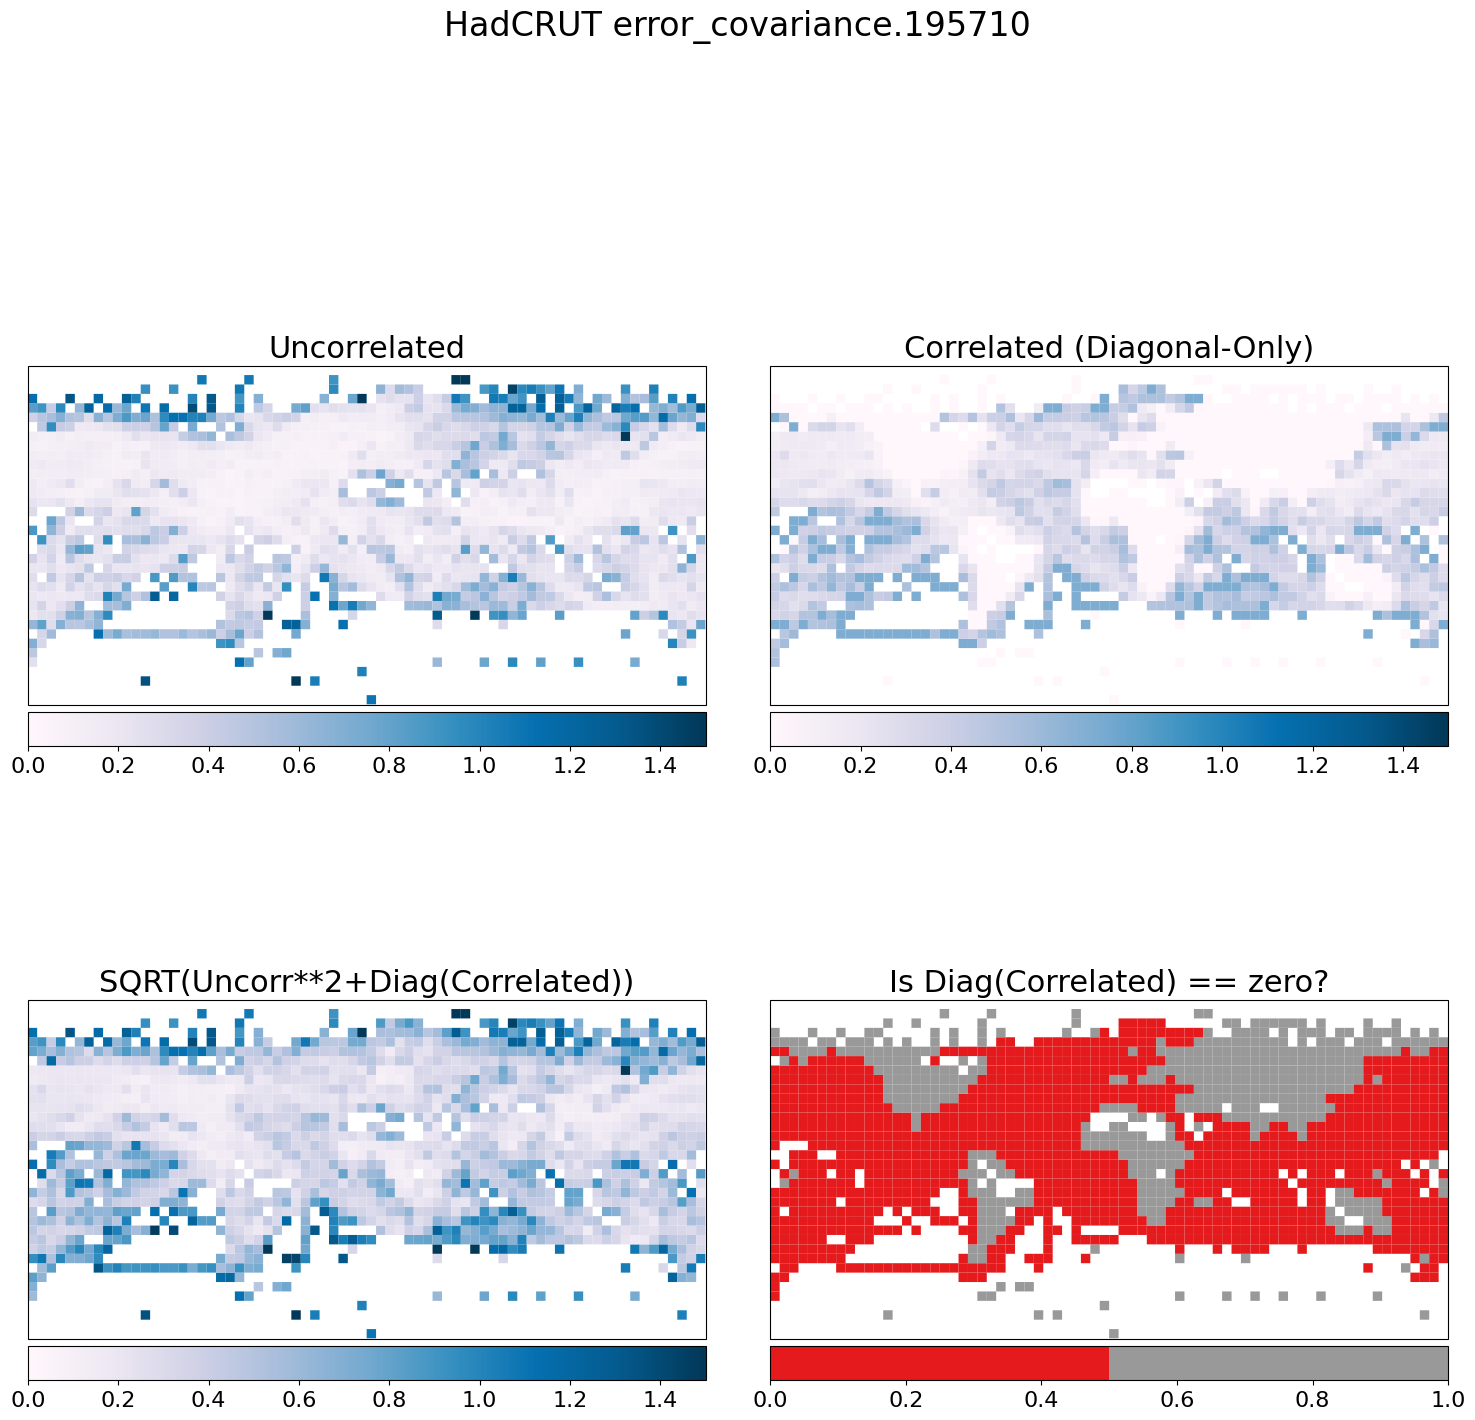

In [19]:
plot_errcov(uncorr_errcov, corr_errcov_diag)